In [1]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt

use_cuda = torch.cuda.is_available()
# device = torch.device("cpu")
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print(device)

cuda


In [2]:
class LSTM_net(nn.Module):
    def __init__(self,input_dim,hidden_dim,output_dim,layer_num):
        super().__init__()
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim
        self.lstm = torch.nn.LSTM(input_dim, hidden_dim,layer_num,batch_first=True)
        self.dr = torch.nn.Dropout2d(0.1)
        self.fc = torch.nn.Linear(hidden_dim,output_dim)
        
        
    def forward(self,inputs):
        x = inputs
        lstm_out,(hn,cn) = self.lstm(x)
        out = self.fc(lstm_out[:,-1,:])
        return out

In [15]:
import pandas as pd
skeletons = pd.read_csv("skels.csv")

In [16]:
LABELS = {0: "cheer up", 1: "jump up", 2:  "hand waving", 3: "sitting down", 4: "clapping"}

In [3]:
import torch
import matplotlib.pyplot as plt
import torchvision
from torchvision import datasets, transforms

In [7]:
import pandas as pd

In [4]:
from torch.utils.data import DataLoader, Dataset

``` DataLoader(dataset, batch_size=1, shuffle=False, sampler=None,
           batch_sampler=None, num_workers=0, collate_fn=None,
           pin_memory=False, drop_last=False, timeout=0,
           worker_init_fn=None) ```

In [ ]:
class Test_Dataset(Dataset):
    def __init__(self):
        self.samples = list(range(0, 100)) ##генерируем случайные данные
        # Все подготовления данных происходят в инициализации:
        # - разделение данных на train/test/ validate
        # - аугментация (трансформация) данных 
        # - чтние аннотаций
        # - считывание по индексу
         # - Применяет выбранные трансформации к данным

    def __len__(self):
        # # Возвращает данные и лейблы
       
        # - отправление данных на гпу
        # - лучше возвращать данные как тензор или словарь
         # - Применяет выбранные трансформации к данным
        return len(self.samples) #возвращаем данные

    def __getitem__(self, idx):
        return (self.samples[idx], label) 
    

In [5]:
class Skeleton_Dataset(Dataset):
    def __init__(self, file_path, transform=None):
        self.data = pd.read_csv(file_path)
        self.transform = transform
        self.labels = self.data.iloc[:,-1]
        self.transform = transform


    def __len__(self):
        return len(self.data) 
    
    
    def __getitem__(self, idx):
        item = np.asarray(self.data.iloc[idx,:-1]).reshape(45,75)
        label = self.labels[idx]
        if self.transform != None:
            item = transform(item)
            
        

        return (item, label) 

In [8]:
dataset = Skeleton_Dataset(file_path = "skels.csv", transform=None)

In [52]:
dataset.data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,3336,3337,3338,3339,3340,3341,3342,3343,3344,3345,3346,3347,3348,3349,3350,3351,3352,3353,3354,3355,3356,3357,3358,3359,3360,3361,3362,3363,3364,3365,3366,3367,3368,3369,3370,3371,3372,3373,3374,labels
0,-0.526048,-0.277147,2.987706,-0.606184,-0.010056,3.010000,-0.681454,0.251614,3.020046,-0.708330,0.386629,3.087164,-0.704835,0.111742,2.856311,-0.515683,-0.024701,2.727949,-0.353615,-0.123308,2.706112,-0.327895,-0.141611,2.749221,-0.511823,0.157910,3.311851,-0.543163,-0.013495,3.108863,-0.496480,-0.181723,2.912678,-0.424105,-0.341968,2.685757,-0.559787,-0.277896,2.867135,-0.187794,...,-0.570154,-0.290760,2.955790,-0.255583,-0.187767,2.804032,-0.094777,-0.625936,2.721997,0.002962,-0.660430,2.645224,-0.491591,-0.281821,2.985380,-0.109749,-0.353734,2.758277,-0.016498,-0.707223,3.037502,0.080172,-0.741614,2.960732,-0.713666,0.178025,2.969061,-0.599133,0.702776,2.722800,-0.619659,0.647852,2.708625,-0.598600,0.593635,2.707864,-0.601837,0.592191,2.697301,0
1,-0.325320,-0.560200,3.244968,-0.296753,-0.312155,3.234485,-0.267607,-0.066345,3.212031,-0.286594,0.049026,3.222926,-0.412259,-0.156479,3.294798,-0.467307,-0.373163,3.353605,-0.452381,-0.607216,3.276438,-0.459716,-0.668793,3.282482,-0.160399,-0.179870,3.150078,-0.136725,-0.403121,3.128864,-0.160573,-0.601392,3.074458,-0.177965,-0.641335,3.074898,-0.368195,-0.549674,3.236222,-0.341016,...,-0.257144,-0.549525,3.252231,-0.284481,-0.867219,3.254666,-0.260625,-1.214738,3.346629,-0.287114,-1.243873,3.252890,-0.167253,-0.557715,3.216227,-0.177271,-0.884009,3.205395,-0.126542,-1.207360,3.246551,-0.155615,-1.256368,3.249898,-0.198894,-0.136859,3.196666,-0.064467,-0.539597,3.214681,-0.066076,-0.459657,3.206000,-0.227804,-0.654428,3.002556,-0.231687,-0.655208,3.000000,1
2,-0.134503,0.387048,3.797468,-0.135835,0.648782,3.669347,-0.137341,0.904024,3.529603,-0.131990,1.040210,3.459599,-0.305457,0.803356,3.557507,-0.347566,0.584975,3.688359,-0.388565,0.400258,3.742037,-0.379674,0.323533,3.767783,0.034142,0.812697,3.575421,0.083355,0.608419,3.697207,0.079156,0.419270,3.766705,0.059876,0.361420,3.788075,-0.211784,0.380342,3.759820,-0.271761,...,-0.250673,0.606249,3.497178,-0.311035,0.334250,3.712313,-0.343928,0.063761,4.068970,-0.354147,-0.027281,3.967637,-0.095314,0.609818,3.490057,-0.045545,0.354838,3.724567,-0.035290,0.029367,4.036292,-0.048035,-0.061396,3.934838,-0.160851,1.087236,3.319579,-0.358098,0.506673,3.490695,-0.332011,0.576840,3.451273,0.011452,0.521624,3.528420,-0.011325,0.589017,3.480000,1
3,0.371560,-0.187321,2.853457,0.388124,0.118966,2.756247,0.402399,0.418116,2.643035,0.354668,0.559822,2.625852,0.286102,0.348658,2.812573,0.241775,0.077759,2.934890,0.153760,-0.150245,2.875890,0.157503,-0.176863,2.863508,0.485513,0.267053,2.568110,0.518208,0.020373,2.588219,0.423660,-0.210078,2.590119,0.397967,-0.293417,2.620825,0.321781,-0.177898,2.866281,0.343763,...,0.329269,-0.174708,2.878668,0.336804,-0.538840,3.011136,0.415498,-0.883922,3.156997,0.344501,-0.925589,3.085428,0.418745,-0.186306,2.767760,0.473212,-0.551371,2.765115,0.550901,-0.958713,2.980955,0.478178,-0.999143,2.910031,0.389971,0.338643,2.666431,0.089315,0.707141,2.796196,0.106246,0.619960,2.735462,0.352891,-0.375651,2.625237,0.465385,-0.316062,2.651301,2
4,-0.193082,-0.178566,2.814345,-0.196894,0.114788,2.849780,-0.198289,0.400548,2.872416,-0.178771,0.542473,2.863049,-0.360317,0.275860,2.827222,-0.401500,0.038034,2.808956,-0.396649,-0.183429,2.708269,-0.390095,-0.255567,2.687460,-0.017156,0.265163,2.868467,0.011366,0.025235,2.858697,0.022230,-0.202932,2.776967,0.016230,-0.287072,2.753526,-0.258041,-0.174188,2.773036,-0.297204,...,-0.333521,-0.585503,3.089381,-0.355346,-0.564656,2.722364,-0.329321,-0.946284,2.762316,-0.323542,-0.986492,2.630332,-0.160405,-0.595503,3.097269,-0.071415,-0.572318,2.738775,-0.107231,-0.941284,2.766737,-0.103634,-0.981497,2.634580,-0.215003,-0.162058,3.060165,-0.551289,-0.465856,2.999218,

In [9]:
skel, lab = dataset.__getitem__(41)

In [18]:
LABELS[lab]

'sitting down'

In [19]:
skel.shape

(45, 75)

In [20]:
skels_for_draw = skel.reshape(-1,25,3)

In [21]:
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [int(0.75*len(dataset)),int(0.25*len(dataset))])
train_loader = DataLoader(train_dataset, batch_size = 16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size = 1, shuffle=True)

In [56]:
for i, data in enumerate(train_loader, 0):
          
  print(len(data[0]))
  print(data[1])

16
tensor([1, 3, 0, 4, 1, 4, 4, 1, 2, 2, 3, 3, 0, 0, 2, 4])
16
tensor([0, 2, 4, 4, 1, 4, 4, 3, 3, 2, 0, 4, 0, 4, 2, 0])
16
tensor([2, 3, 2, 1, 0, 4, 1, 1, 4, 2, 3, 1, 4, 1, 1, 3])
16
tensor([0, 0, 3, 4, 1, 4, 3, 2, 2, 0, 3, 2, 2, 0, 4, 0])
16
tensor([0, 2, 2, 3, 2, 3, 3, 4, 2, 4, 1, 3, 2, 2, 0, 0])
16
tensor([3, 3, 2, 3, 3, 4, 4, 4, 3, 4, 3, 1, 2, 1, 3, 1])
16
tensor([4, 4, 4, 3, 1, 2, 4, 2, 4, 2, 1, 3, 0, 2, 1, 1])
16
tensor([2, 3, 0, 4, 0, 0, 4, 2, 2, 4, 2, 2, 2, 1, 4, 3])
16
tensor([4, 2, 1, 1, 0, 2, 0, 4, 3, 4, 0, 4, 2, 2, 1, 4])
16
tensor([1, 1, 2, 2, 0, 3, 4, 1, 4, 3, 0, 4, 1, 1, 2, 3])
16
tensor([4, 0, 3, 0, 2, 1, 2, 4, 3, 3, 0, 2, 1, 3, 2, 1])
16
tensor([3, 1, 1, 1, 1, 1, 3, 1, 0, 3, 2, 2, 1, 4, 0, 2])
16
tensor([2, 0, 3, 3, 2, 1, 0, 2, 0, 0, 0, 0, 3, 0, 2, 2])
16
tensor([1, 1, 3, 3, 3, 4, 2, 4, 2, 4, 2, 0, 3, 3, 1, 3])
16
tensor([1, 0, 4, 2, 3, 1, 0, 3, 2, 2, 0, 2, 1, 3, 4, 0])
16
tensor([0, 3, 1, 3, 0, 0, 4, 4, 1, 3, 3, 0, 3, 3, 2, 3])
16
tensor([0, 2, 0, 2, 3, 0, 0, 3, 3, 0,

In [23]:
def categoryFromOutput(output):
    top_n, top_i = output.topk(1)
    category_i = top_i[0].item()
#     print(output.topk(5))
    return LABELS[category_i], category_i

def timeSince(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

In [30]:
from torch import optim
import time
import math
lstm_loss=[]
for q in range(1,5):
  n_hidden = 128
  n_joints = 25*3
  n_categories = len(LABELS)
  n_layer = q
  rnn = LSTM_net(n_joints,n_hidden,n_categories,n_layer)
  rnn.to(device)
  criterion = nn.CrossEntropyLoss()
  learning_rate = 0.0007
  optimizer = optim.SGD(rnn.parameters(),lr=learning_rate,momentum=0.9)

  all_losses = []
  start = time.time()
  counter = 0
  for epoch in range(300):  
      current_loss = 0
      running_loss = 0.0
      for i, data in enumerate(train_loader, 0):
          
          inputs, labels = data[0].to(device), data[1].to(device)
          optimizer.zero_grad()
      
          output = rnn(inputs.float())
          loss = criterion(output, labels)
          loss.backward()
          optimizer.step() 


          current_loss += loss.item()
          category = LABELS[int(labels[0])]

          if counter % 300 == 0:
              guess, guess_i = categoryFromOutput(output)
              correct = '✓' if guess == category else '✗ (%s)' % category
              print('epoch : %d iter : %d (%s) %.4f  / %s %s' % (epoch, i, timeSince(start), loss, guess, correct))

          
          counter = counter + 1
      if counter % 100 == 0:
          all_losses.append(current_loss / 25)
          current_loss = 0
  
  lstm_loss.append(all_losses)
  print(lstm_loss)

epoch : 0 iter : 0 (0m 0s) 1.6278  / sitting down ✗ (hand waving)
epoch : 10 iter : 0 (0m 8s) 1.4708  / sitting down ✗ (clapping)
epoch : 20 iter : 0 (0m 17s) 1.3548  / cheer up ✓
epoch : 30 iter : 0 (0m 25s) 0.9723  / cheer up ✓
epoch : 40 iter : 0 (0m 34s) 1.0613  / cheer up ✓
epoch : 50 iter : 0 (0m 42s) 1.2562  / hand waving ✓
epoch : 60 iter : 0 (0m 51s) 1.0121  / cheer up ✓
epoch : 70 iter : 0 (1m 0s) 1.1443  / cheer up ✓
epoch : 80 iter : 0 (1m 8s) 0.8130  / sitting down ✓
epoch : 90 iter : 0 (1m 17s) 0.6504  / jump up ✓
epoch : 100 iter : 0 (1m 26s) 0.7744  / clapping ✓
epoch : 110 iter : 0 (1m 34s) 0.6156  / cheer up ✓
epoch : 120 iter : 0 (1m 43s) 0.5305  / clapping ✓
epoch : 130 iter : 0 (1m 51s) 0.5067  / cheer up ✓
epoch : 140 iter : 0 (2m 0s) 0.6161  / cheer up ✓
epoch : 150 iter : 0 (2m 8s) 0.4135  / sitting down ✓
epoch : 160 iter : 0 (2m 17s) 0.5412  / cheer up ✓
epoch : 170 iter : 0 (2m 25s) 0.3359  / sitting down ✓
epoch : 180 iter : 0 (2m 34s) 0.6695  / hand waving 

In [44]:
mean_loss=[np.mean(x[-5:]) for x in lstm_loss ]

In [45]:
mean_loss

[0.380522207736969, 0.592505919367075, 0.5027892592549323, 1.0727650187015532]

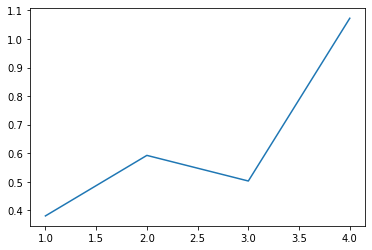

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(list(range(1,5)),mean_loss)
plt.show()

Таким образом ошибка мниимальна при одном ЛСТМ слое.